In [1]:
import os
import pandas as pd
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
from AnalyserTools import AnalyserTools as ant

In [2]:
path_dir_rms_display_0: str = r"/home/svergani/monitoring/files/rms_display_0/"
path_dir_rms_display_1: str = r"/home/svergani/monitoring/files/rms_display_1/"
path_dir_rms_display_2: str = r"/home/svergani/monitoring/files/rms_display_2/"

In [3]:
rms_display_0 = []
ant.file_creator(path_dir_rms_display_0,rms_display_0)
rms_display_0 = np.array(rms_display_0)

In [4]:
rms_display_1 = []
ant.file_creator(path_dir_rms_display_1,rms_display_1)
rms_display_1 = np.array(rms_display_1)

In [8]:
rms_display_2 = []
ant.file_creator(path_dir_rms_display_2,rms_display_2)
rms_display_2 = np.array(rms_display_2)

In [9]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [30, 20]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

In [10]:
time_0 = np.arange(rms_display_0.shape[0])*10
time_1 = np.arange(rms_display_1.shape[0])*10
time_2 = np.arange(rms_display_2.shape[0])*10

In [11]:
#I open one sample file per display to extract the channels
f_0 = h5.File(os.sep.join([path_dir_rms_display_0, "rms_display-0-220525-153758.hdf5"]), "r")
f_1 = h5.File(os.sep.join([path_dir_rms_display_1, "rms_display-1-220525-153758.hdf5"]), "r")
f_2 = h5.File(os.sep.join([path_dir_rms_display_2, "rms_display-2-220525-153758.hdf5"]), "r")

In [12]:
channels_0 = np.array(f_0.get('channels').value)
channels_1 = np.array(f_1.get('channels').value)
channels_2 = np.array(f_2.get('channels').value)

In [13]:
#this is my way to create the channels to be plotted on the 3d plot
#this will loose the information about the channel number
#but no hole

channels_3d_0 = []
for i in range(channels_0.size):
    channels_3d_0.append(np.ones(time_0.size,dtype=int)*i)
channels_3d_0 = np.array(channels_3d_0)

channels_3d_1 = []
for i in range(channels_1.size):
    channels_3d_1.append(np.ones(time_1.size,dtype=int)*i)
channels_3d_1 = np.array(channels_3d_1)

channels_3d_2 = []
for i in range(channels_2.size):
    channels_3d_2.append(np.ones(time_2.size,dtype=int)*i)
channels_3d_2 = np.array(channels_3d_2)

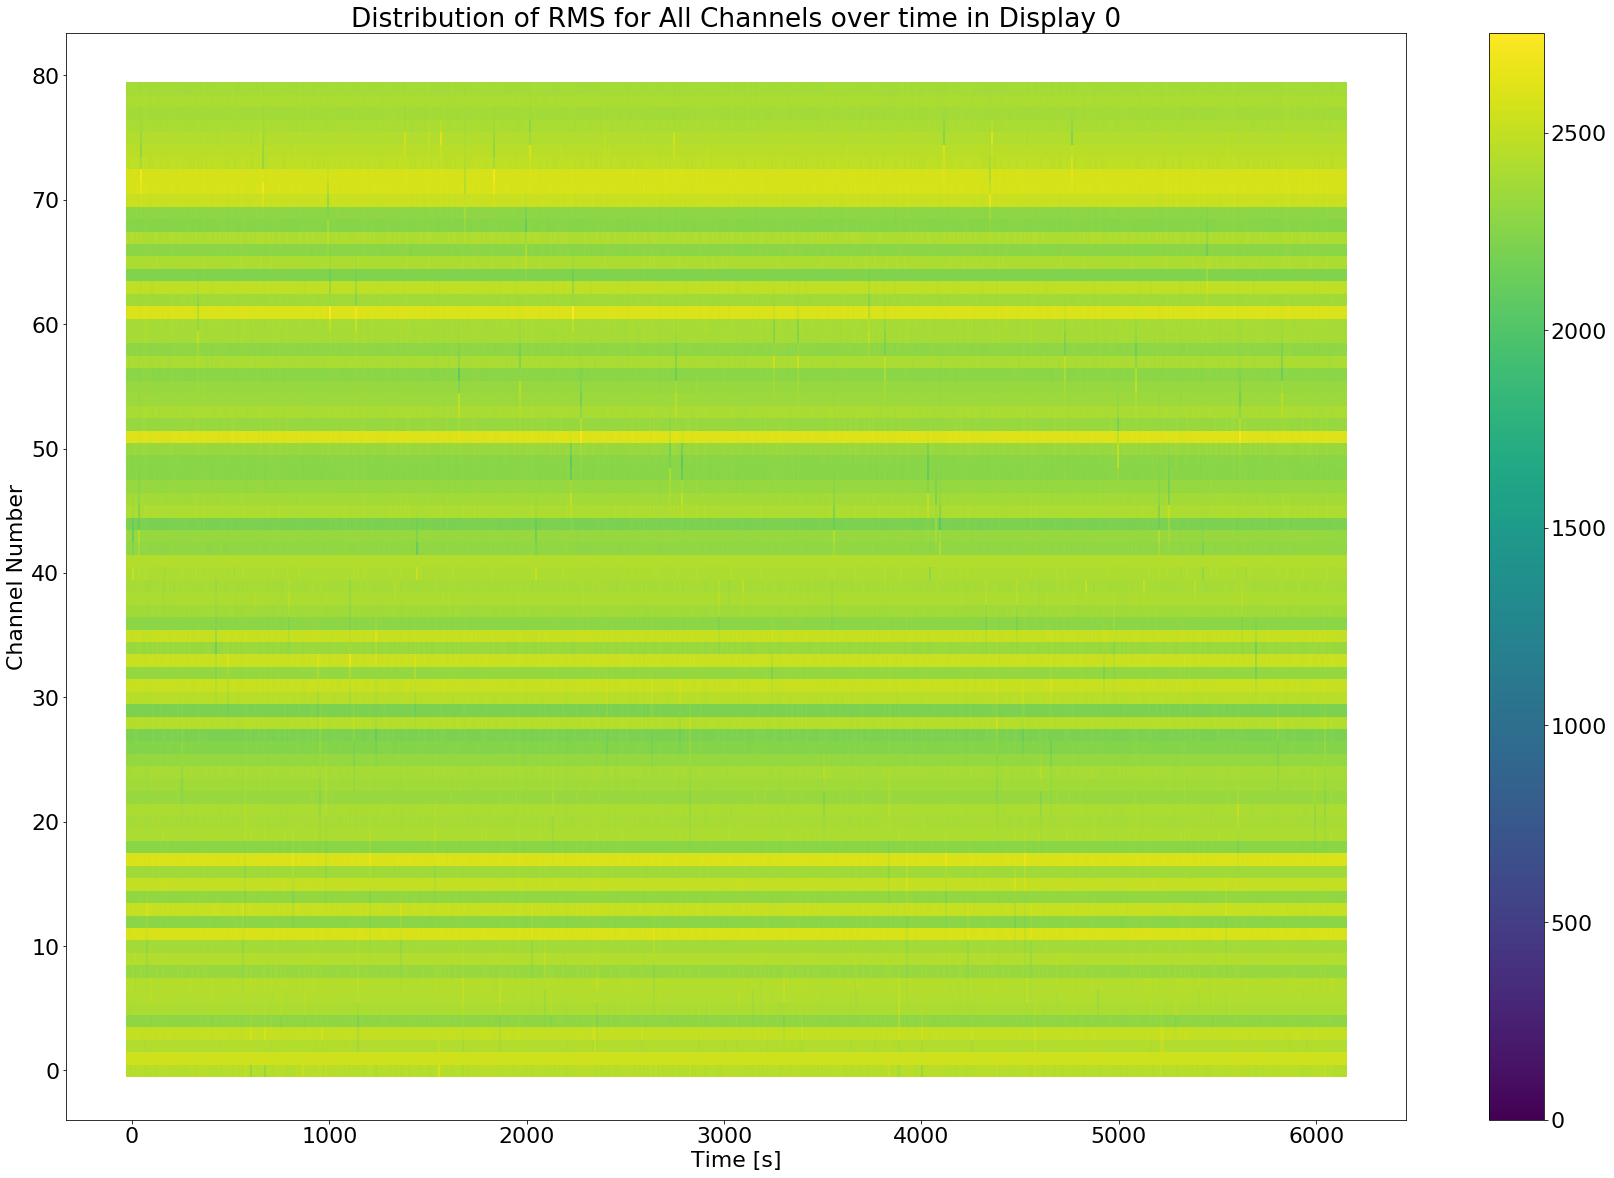

In [14]:
fig, ax = plt.subplots()
highest_value = 0
for i in range(rms_display_0.shape[1]):
    if(np.amax(rms_display_0[:,i])>highest_value):
        highest_value=np.amax(rms_display_0[:,i])
for i in range(rms_display_0.shape[1]):
    sc=ax.scatter(time_0, channels_3d_0[i,:], c=rms_display_0[:,i],vmin=0, vmax=highest_value,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0, vmax=highest_value)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Distribution of RMS for All Channels over time in Display 0")
plt.show()

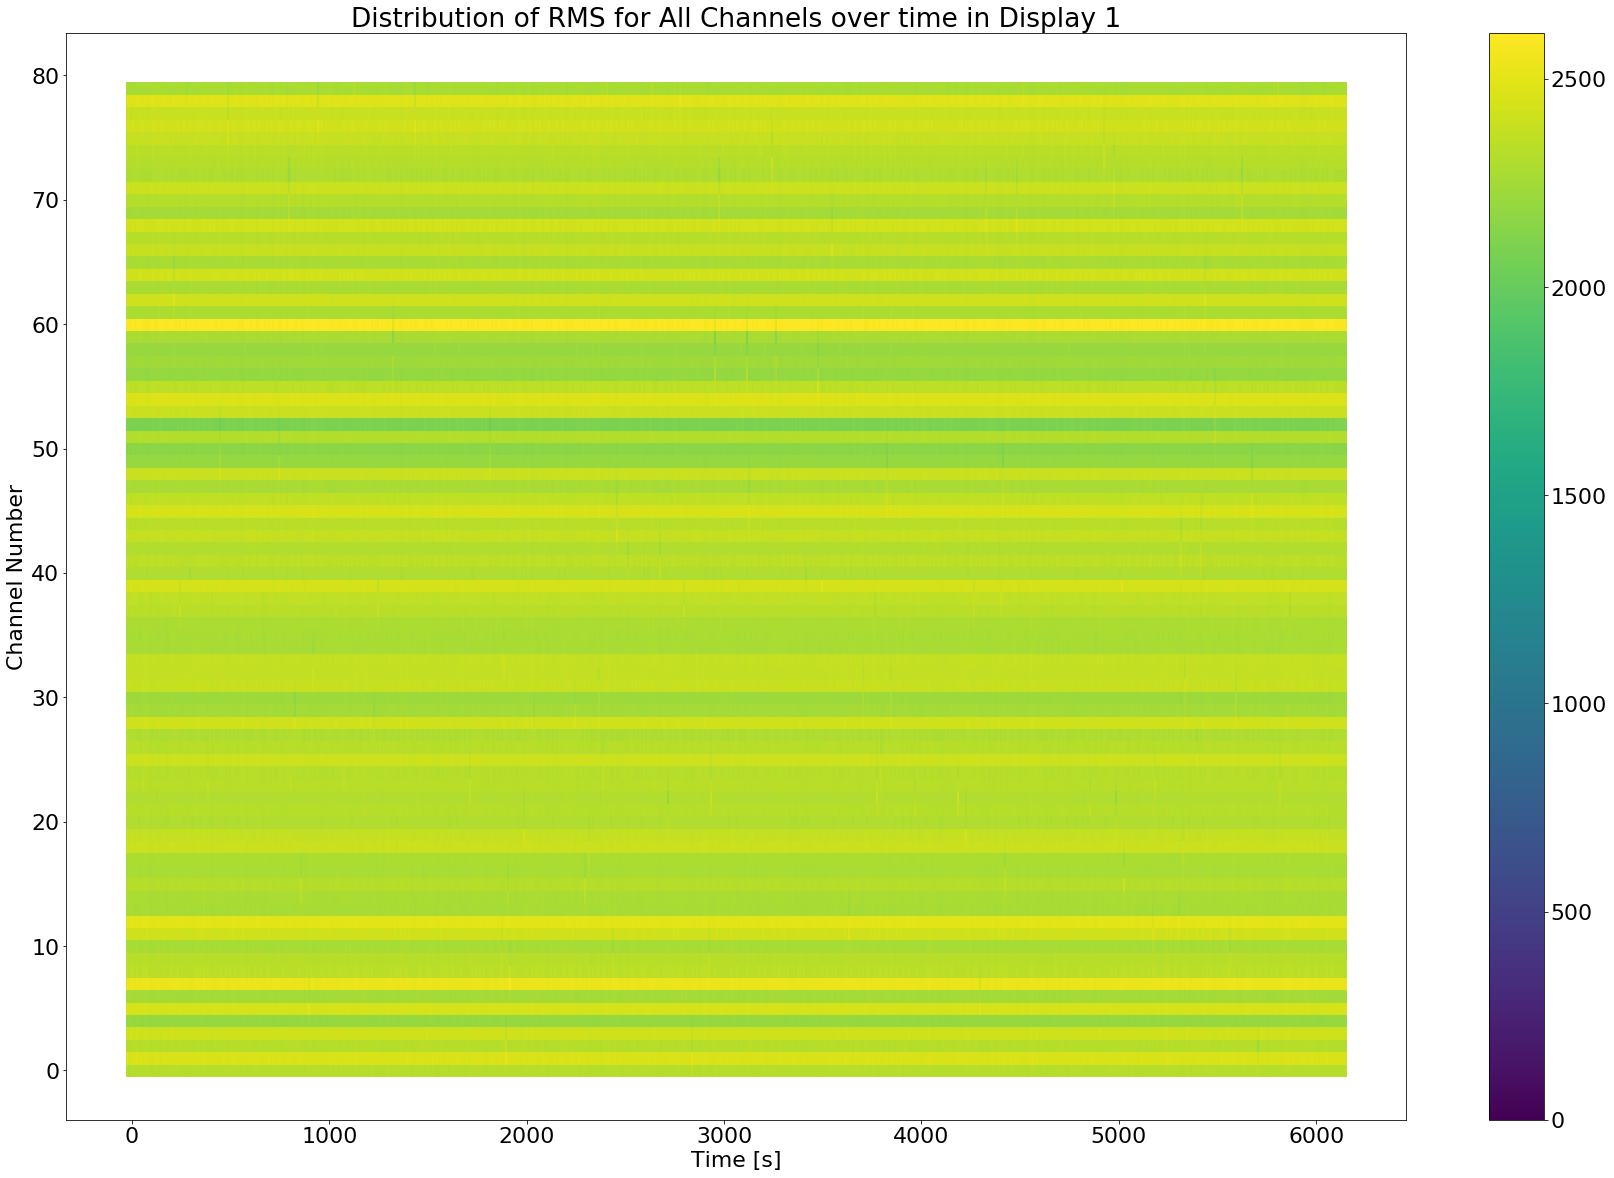

In [15]:
fig, ax = plt.subplots()
highest_value = 0
for i in range(rms_display_1.shape[1]):
    if(np.amax(rms_display_1[:,i])>highest_value):
        highest_value=np.amax(rms_display_1[:,i])
for i in range(rms_display_1.shape[1]):
    sc=ax.scatter(time_1, channels_3d_1[i,:], c=rms_display_1[:,i],vmin=0, vmax=highest_value,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0, vmax=highest_value)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Distribution of RMS for All Channels over time in Display 1")
plt.show()

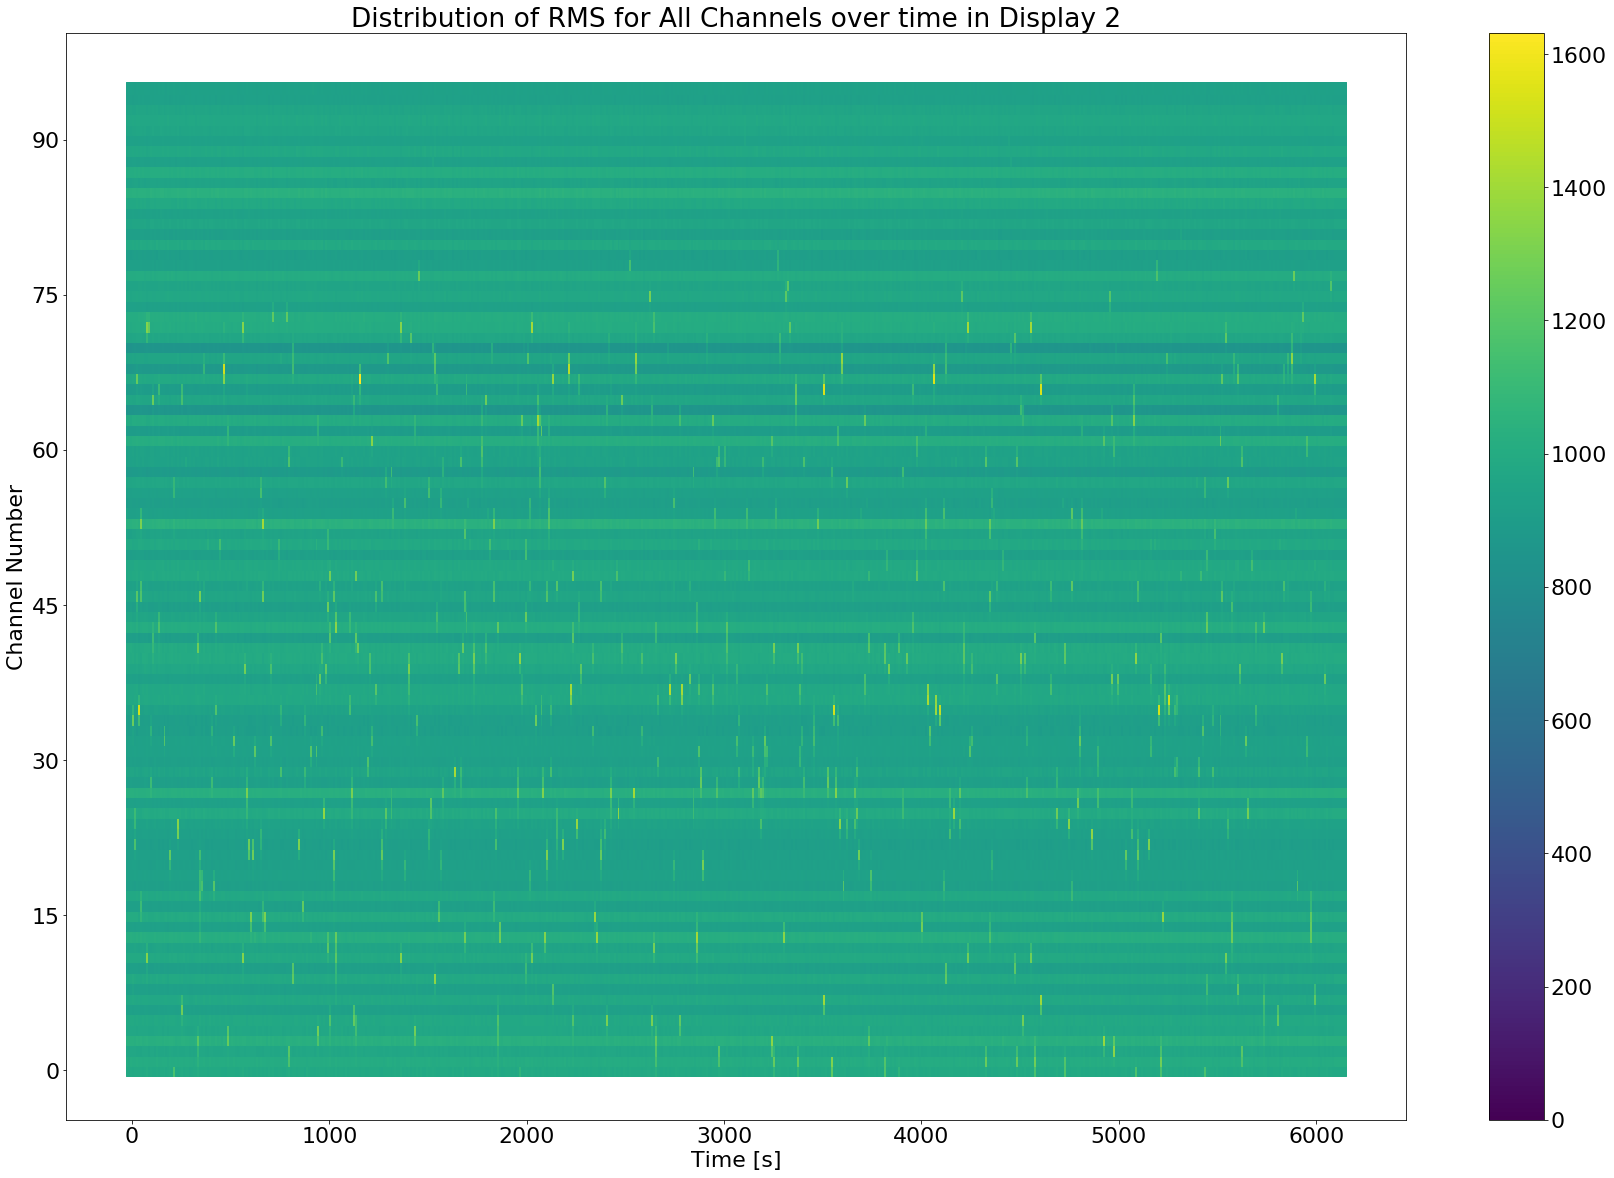

In [16]:
fig, ax = plt.subplots()
highest_value = 0
for i in range(rms_display_2.shape[1]):
    if(np.amax(rms_display_2[:,i])>highest_value):
        highest_value=np.amax(rms_display_2[:,i])
for i in range(rms_display_2.shape[1]):
    sc=ax.scatter(time_2, channels_3d_2[i,:], c=rms_display_2[:,i],vmin=0, vmax=highest_value,marker=',',s=140)
    
normalize = mpl.colors.Normalize(vmin=0, vmax=highest_value)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))#forces it to take only integer values
ax.set_title("Distribution of RMS for All Channels over time in Display 2")
plt.show()

In [ ]:
# I create a hdf5 file containing the rmsm over the different measurements
# I initialise a new file

path_dir_target: str = r"/home/svergani/monitoring/hdf5_created_files"
hf_target_0 = h5.File(os.sep.join([path_dir_target, "rms_display_0_2022_05_22.hdf5"]), 'w')
hf_target_1 = h5.File(os.sep.join([path_dir_target, "rms_display_1_2022_05_22.hdf5"]), 'w')
hf_target_2 = h5.File(os.sep.join([path_dir_target, "rms_display_2_2022_05_22.hdf5"]), 'w')

In [ ]:
hf_target_0.create_dataset('rms_display_0', data=rms_display_0)
hf_target_0.create_dataset('channels_0', data=channels_0)
hf_target_1.create_dataset('rms_display_1', data=rms_display_1)
hf_target_1.create_dataset('channels_1', data=channels_1)
hf_target_2.create_dataset('rms_display_2', data=rms_display_2)
hf_target_2.create_dataset('channels_2', data=channels_2)

In [ ]:
hf_target_0.close()
hf_target_1.close()
hf_target_2.close()